# first let's import some modules

In [ ]:
import gym
import time
from gym.envs.registration import register
import argparse
import sys
import gym
import numpy as np
import torch
import torch.nn as nn
from torch.nn import functional as F
import imageio
import json
from collections import defaultdict
import matplotlib.pyplot as plt

## the following code loads the policy(which are saved in json format)
also defines some necessary functions that we are going to use:<br>
The getadvobs function parse the default observation generated from the environment and returns the observation that's needed for the adversary


In [ ]:
with open('./savedmodels/policy4.json', 'r') as fp:
    str_policy = json.load(fp)
data = {eval(k): np.array(v) for k, v in str_policy.items()}
def default_value():
    return np.array([300.0, 300.0, 300.0, 300.0])
apolicy = defaultdict(default_value, data)
def greedy_policy(Qtable, state):
    Qarray = Qtable[state]
    action = np.argmax(Qarray)
    return action
def getadvobs(obs):
    advobs = np.append(obs[3], obs[6])
    return tuple(advobs)

## disclaimer:
jupyternotbook is not too friendly with rendering a video real time, so here I can only just print it frame by frame with matplotlib, I would recommend you guys go to the "./multiagent-catch-flag/algorithms" directory to run the corresponding scripts if you prefer testing this with a video. The scripts names will be provided below

# adversary demo with two player position fixed
(multiagent-catch-flag/algorithms/testagent.py)

In [ ]:
register(
        id='multigrid-collect-v1',
        entry_point='gym_multigrid.envs:CollectGame15by5',
    )
env = gym.make('multigrid-collect-v1')
state = env.reset()

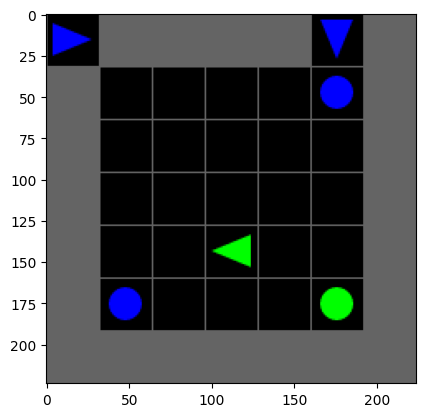

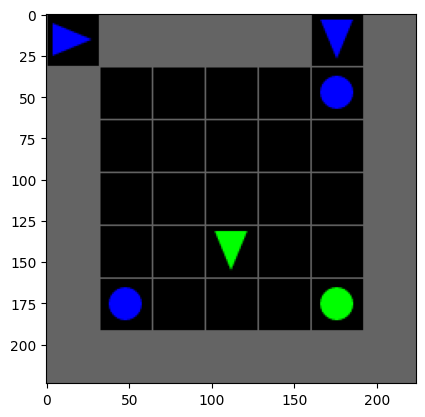

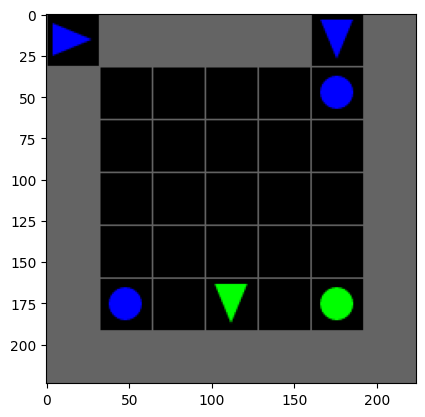

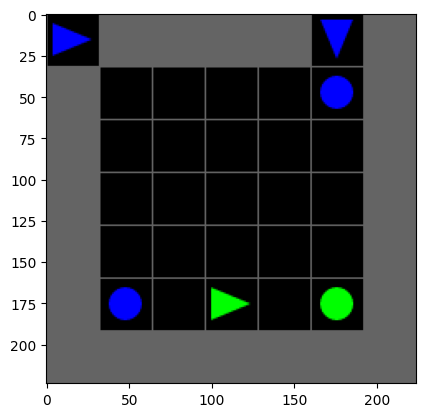

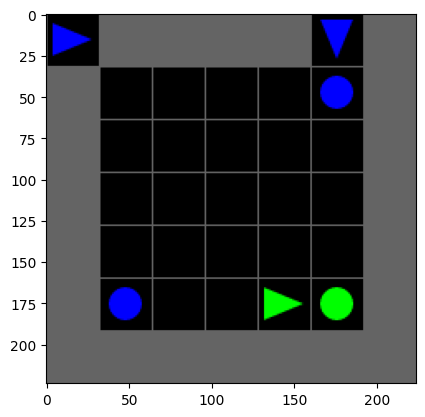

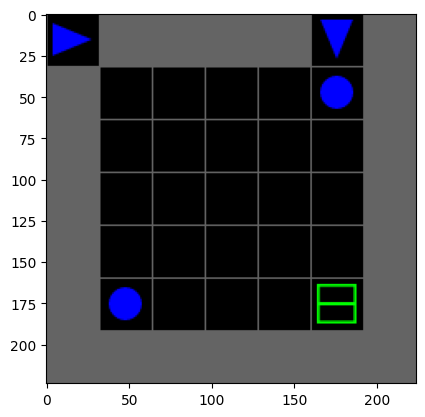

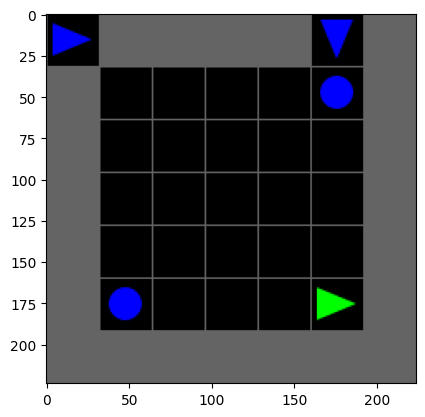

In [ ]:
state = env.reset()
state = getadvobs(state)
done = False
img = env.render(mode='rgb_array')
plt.imshow(img)
plt.show()
counter = 0
while not done:
    action = greedy_policy(apolicy, state) + 1
    actions = []
    actions.append(action)
    actions.append(0)
    actions.append(0)
    counter +=1
    state, reward, done, info = env.step(actions) # We directly put next_stat
    state = getadvobs(state)
    img = env.render(mode='rgb_array')
    plt.imshow(img)
    plt.show()
    if counter >= 200:
        break

<div>as you guys can see usually it does not take long for the adversary to find the ball and collect it  </div>

# two player team demo with one players fixed(Centralized approach)
(./algorithms/test2agent_1.py)

In [ ]:
with open('./savedmodels/policyp1p2.json', 'r') as fp:
    str_policy = json.load(fp)
data = {eval(k): np.array(v) for k, v in str_policy.items()}
def default_value():
    return np.array([300.0, 300.0, 300.0, 300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0, 300.0, 300.0, 300.0,300.0,300.0])
apolicy = defaultdict(default_value, data)

In [ ]:
def action_look(actnum):
    player1 = actnum//4
    player2 = actnum%4
    return [player1,player2]
def actnum_look(actions):
    player1 = actions[0]
    player2 = actions[1]
    return int(player1*4 + player2)
def greedy_policy(Qtable, state):
    Qarray = Qtable[state]
    action = np.argmax(Qarray)
    return action_look(action)
def getplayerobs(obs):
    p1obs = np.append(obs[4], obs[7])
    p2obs = np.append(obs[5], obs[8])
    players = np.append(p1obs,p2obs)
    return tuple(players)

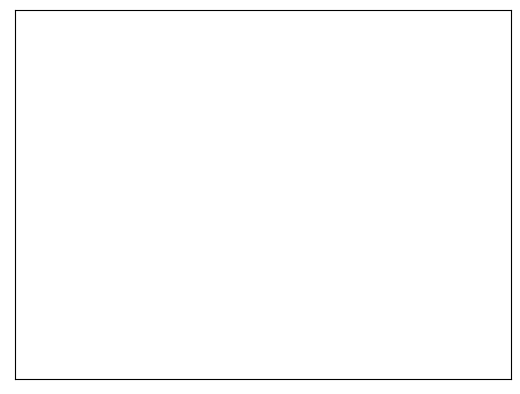

In [ ]:
register(
        id='multigrid-collect-v2',
        entry_point='gym_multigrid.envs:CollectGame235by5',
    )
env = gym.make('multigrid-collect-v2')
state = env.reset()
state = getplayerobs(state)
done = False
img = env.render(mode='human')
plt.imshow(img)
plt.show()
counter = 0
while not done:
    actions = greedy_policy(apolicy, state)
    print(actions[0] +1, actions[1]+1)
    actions = [0,actions[0]+1,actions[1]+1]
    new_state, reward, done,info = env.step(actions)
    new_state = getplayerobs(new_state)
    state = new_state
    img = env.render(mode= 'human')
    plt.imshow(img)
    plt.show()
    if counter >= 200:
        break

you will see that sometimes it's able to finish:https://www.youtube.com/shorts/0tY2ovI94Kc

sometimes it stucks between two states https://youtube.com/shorts/WEcJMkrMs6k?feature=share

# other tests available:
algorithms\test2player.py tests the two player team with 14 dimensional encoding(two more boolean encodings)<br>
algorithms\agent_playground.py puts the two player team against the adversary , you will see that sometimes two teams stuck in a deadlock situation in which one player is stuck in another player's way. That's because we have not taught the agents in a setting that considers the existence of an adversary yet <br>

 